In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
train.head()
test = pd.read_csv("test.csv")
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import matplotlib
from matplotlib import font_manager, rc
import platform
import numpy as np

In [3]:
try:
    if platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
        rc('font',family=font_name)
    else:
        rc('font', family='AppleGothic')
except:
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
#결측치 처리
train.loc[train['DAYS_EMPLOYED'] > 0, 'occyp_type'] = 'unemployed'
test.loc[test['DAYS_EMPLOYED'] > 0, 'occyp_type'] = 'unemployed'
train.loc[(train['income_type'] == 'Student'), 'occyp_type'] = 'unemployed'
test.loc[(test['income_type'] == 'Student'), 'occyp_type'] = 'unemployed'
train = train.fillna('Unknown')
test = test.fillna('Unknown')

In [5]:
train = train[(train['child_num'] <= 7)].reset_index(drop=True)

In [6]:
train = train[(train['family_size'] <= 7)].reset_index(drop=True)

In [7]:
train.drop(["FLAG_MOBIL"], axis=1, inplace=True)
test.drop(["FLAG_MOBIL"], axis=1, inplace=True)
train.drop(["index"], axis=1, inplace=True)
test.drop(["index"], axis=1, inplace=True)

In [8]:
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

In [9]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'] * -1
test['DAYS_BIRTH'] = test['DAYS_BIRTH'] * -1

train['begin_month'] = train['begin_month'] * -1
test['begin_month'] = test['begin_month'] * -1

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] * -1
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] * -1

In [10]:
# ability : 소득/(살아온 일수 + 근무 일수)
train['ability'] = train['income_total'] / (train['DAYS_BIRTH'] + train['DAYS_EMPLOYED'])
test['ability'] = test['income_total'] / (test['DAYS_BIRTH'] + test['DAYS_EMPLOYED'])

train['id'] = train['email'].astype(str) + '_' + train['car'].astype(str) + '_' + train['family_type'].astype(str) + '_' + \
    train['occyp_type'].astype(str) + '_' + train['child_num'].astype(str) + train['DAYS_EMPLOYED'].astype(str) + '_' + \
    train['house_type'].astype(str) + '_' + train['gender'].astype(str) + '_' + train['DAYS_BIRTH'].astype(str) + '_' + \
    train['edu_type'].astype(str) + '_' + train['income_type'].astype(str)
test['id'] = test['email'].astype(str) + '_' + test['car'].astype(str) + '_' + test['family_type'].astype(str) + '_' + \
    test['occyp_type'].astype(str) + '_' + test['child_num'].astype(str) + test['DAYS_EMPLOYED'].astype(str) + '_' + \
    test['house_type'].astype(str) + '_' + test['gender'].astype(str) + '_' + test['DAYS_BIRTH'].astype(str) + '_' + \
    test['edu_type'].astype(str) + '_' + test['income_type'].astype(str)

# # dependency_ratio   부양 비율 : 자녀수 / 가족수
# train['dependency_ratio'] = train['child_num'] / train['family_size']
# test['dependency_ratio'] = test['child_num'] / test['family_size']


# employed_life_ratio  생에 근무 기간 : 근무 일수 / 살아온 일수
train['employed_life_ratio'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']
test['employed_life_ratio'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

train['BEFORE_EMPLOYED'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']
test['BEFORE_EMPLOYED'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']

train['BEFORE_EMPLOYED_M'] = np.floor(train['BEFORE_EMPLOYED'] / 30) - ((np.floor(train['BEFORE_EMPLOYED'] / 30) / 12).astype(int) * 12)
train['BEFORE_EMPLOYED_W'] = np.floor(train['BEFORE_EMPLOYED'] / 7) - ((np.floor(train['BEFORE_EMPLOYED'] / 7) / 4).astype(int) * 4)
test['BEFORE_EMPLOYED_M'] = np.floor(test['BEFORE_EMPLOYED'] / 30) - ((np.floor(test['BEFORE_EMPLOYED'] / 30) / 12).astype(int) * 12)
test['BEFORE_EMPLOYED_W'] = np.floor(test['BEFORE_EMPLOYED'] / 7) - ((np.floor(test['BEFORE_EMPLOYED'] / 7) / 4).astype(int) * 4)


# employed_begin_ratio   신용카드 발급 후 근무 경과 일수 : 근무 일수 / 카드 개설 후 경과 개월 수
train['employed_begin_ratio'] = train['DAYS_EMPLOYED'] / train['begin_month']
test['employed_begin_ratio'] = test['DAYS_EMPLOYED'] / test['begin_month']

#income_per_child 소득 대비 자녀 수
train['income_per_child'] = train['income_total'] / (train['child_num'] + 1)
test['income_per_child'] = test['income_total'] / (test['child_num'] + 1)

# income_per_day  하루 평균 소득 : 총 소득 / 살아온 일 수
train['income_per_day'] = train['income_total'] / train['DAYS_BIRTH']
test['income_per_day'] = test['income_total'] / test['DAYS_BIRTH']

In [11]:
#데이터 확인
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  18
Number of Categorical features:  9


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [13]:
# log 변환
log_features = ['income_total']
for feature in log_features:
    train[feature] = np.log1p(train[feature])
    test[feature] = np.log1p(test[feature])

In [14]:
category_features = train.select_dtypes(include=['object', 'category']).columns
label_encoders={}

In [15]:
for feature in category_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    prev_classes = list(le.classes_)

    for label in np.unique(test[feature].astype(str)):
        if label not in prev_classes:
            prev_classes.append(label)

    le.classes_ = np.array(prev_classes)
    test[feature] = le.transform(test[feature].astype(str))
    label_encoders[feature] = le

In [16]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [18]:
numeric_features = list(train.select_dtypes(include=[np.number]).columns)

In [19]:
from sklearn.preprocessing import StandardScaler
numerical_feats.remove('income_total')
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

In [20]:
if 'credit' in train.columns:
    target = train['credit']
    train = train.drop('credit', axis=1)
else:
    raise ValueError("The 'credit' column is not found in the train dataframe.")

In [21]:
#train.drop(["child_num"], axis=1, inplace=True)
#test.drop(["child_num"], axis=1, inplace=True)
#train.drop(["family_size"], axis=1, inplace=True)
#test.drop(["family_size"], axis=1, inplace=True)

In [22]:
train['id'] = np.log1p(train['id'])
test['id'] = np.log1p(test['id'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.3, random_state=42)

In [24]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
y_pred_proba = rf.predict_proba(X_valid)
from sklearn.metrics import accuracy_score, log_loss
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Log Loss:", log_loss(y_valid, y_pred_proba))
#Accuracy: 0.7095514112903226
#Log Loss: 0.8997427485837229

Accuracy: 0.7098034274193549
Log Loss: 0.9422943769388566


In [25]:
#Light GBM
import lightgbm
lgb = lightgbm.LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_valid)
y_pred_proba = lgb.predict_proba(X_valid)
print("LightGBM Accuracy:", accuracy_score(y_valid, y_pred))
print("LightGBM Log Loss:", log_loss(y_valid, y_pred_proba))
#LightGBM Accuracy: 0.7113155241935484
#LightGBM Log Loss: 0.7368883829118323

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 18515, number of used features: 27
[LightGBM] [Info] Start training from score -2.081767
[LightGBM] [Info] Start training from score -1.445880
[LightGBM] [Info] Start training from score -0.446675
LightGBM Accuracy: 0.7129536290322581
LightGBM Log Loss: 0.7259507861988458


In [26]:
#CatBoost 캣부스트
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_valid)
y_pred_proba = cat.predict_proba(X_valid)
print("CatBoost Accuracy:", accuracy_score(y_valid, y_pred))
print("CatBoost Log Loss:", log_loss(y_valid, y_pred_proba))
#CatBoost Accuracy: 0.7155997983870968
#CatBoost Log Loss: 0.7300653320503562

CatBoost Accuracy: 0.7144657258064516
CatBoost Log Loss: 0.7267445876789214


In [27]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,ability,id,dependency_ratio,employed_life_ratio,BEFORE_EMPLOYED,BEFORE_EMPLOYED_M,BEFORE_EMPLOYED_W,employed_begin_ratio,income_per_child,income_per_day
0,0,0,0,-0.589850,12.218500,0,1,1,2,-0.490076,1.059065,-0.538321,-0.645632,-0.316977,17,-0.216262,-1.215242,-0.032496,7.885705,-0.639039,1.371127,-0.939097,0.166791,-1.348417,1.373835,0.495601,0.241076
1,0,0,1,0.795036,12.419170,0,4,0,1,-1.089581,-0.277867,-0.538321,-0.645632,3.154805,8,0.897294,-1.275633,1.190137,8.982059,1.032109,-0.073655,-0.805515,-0.418442,-0.458877,0.299840,-0.308759,1.160325
2,1,1,1,-0.589850,13.017005,4,1,1,1,0.744635,0.943049,-0.538321,1.548870,-0.316977,10,-0.216262,-0.248981,1.186515,8.773849,-0.639039,0.614948,0.183614,0.752023,-0.458877,0.060068,3.023590,1.394331
3,0,0,1,-0.589850,12.218500,0,4,1,1,-0.207101,-0.044990,-0.538321,1.548870,-0.316977,14,-0.216262,0.656889,0.101168,7.666222,-0.639039,-0.050024,-0.156919,-1.296291,-1.348417,-0.266534,0.495601,0.094067
4,0,1,1,-0.589850,11.967187,2,1,1,1,-0.219239,-0.039505,-0.538321,-0.645632,-0.316977,10,-0.216262,-0.007416,-0.282885,8.765146,-0.639039,-0.040547,-0.170072,1.629872,1.320202,-0.211529,0.035967,-0.283285


In [38]:
import xgboost as xgb
import optuna

In [29]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_valid)
y_pred_proba = xgb_model.predict_proba(X_valid)
print("XGBoost Accuracy:", accuracy_score(y_valid, y_pred))
print("XGBoost Log Loss:", log_loss(y_valid, y_pred_proba))

XGBoost Accuracy: 0.721648185483871
XGBoost Log Loss: 0.7153991678266829


In [30]:
correlation_matrix = train.corr()

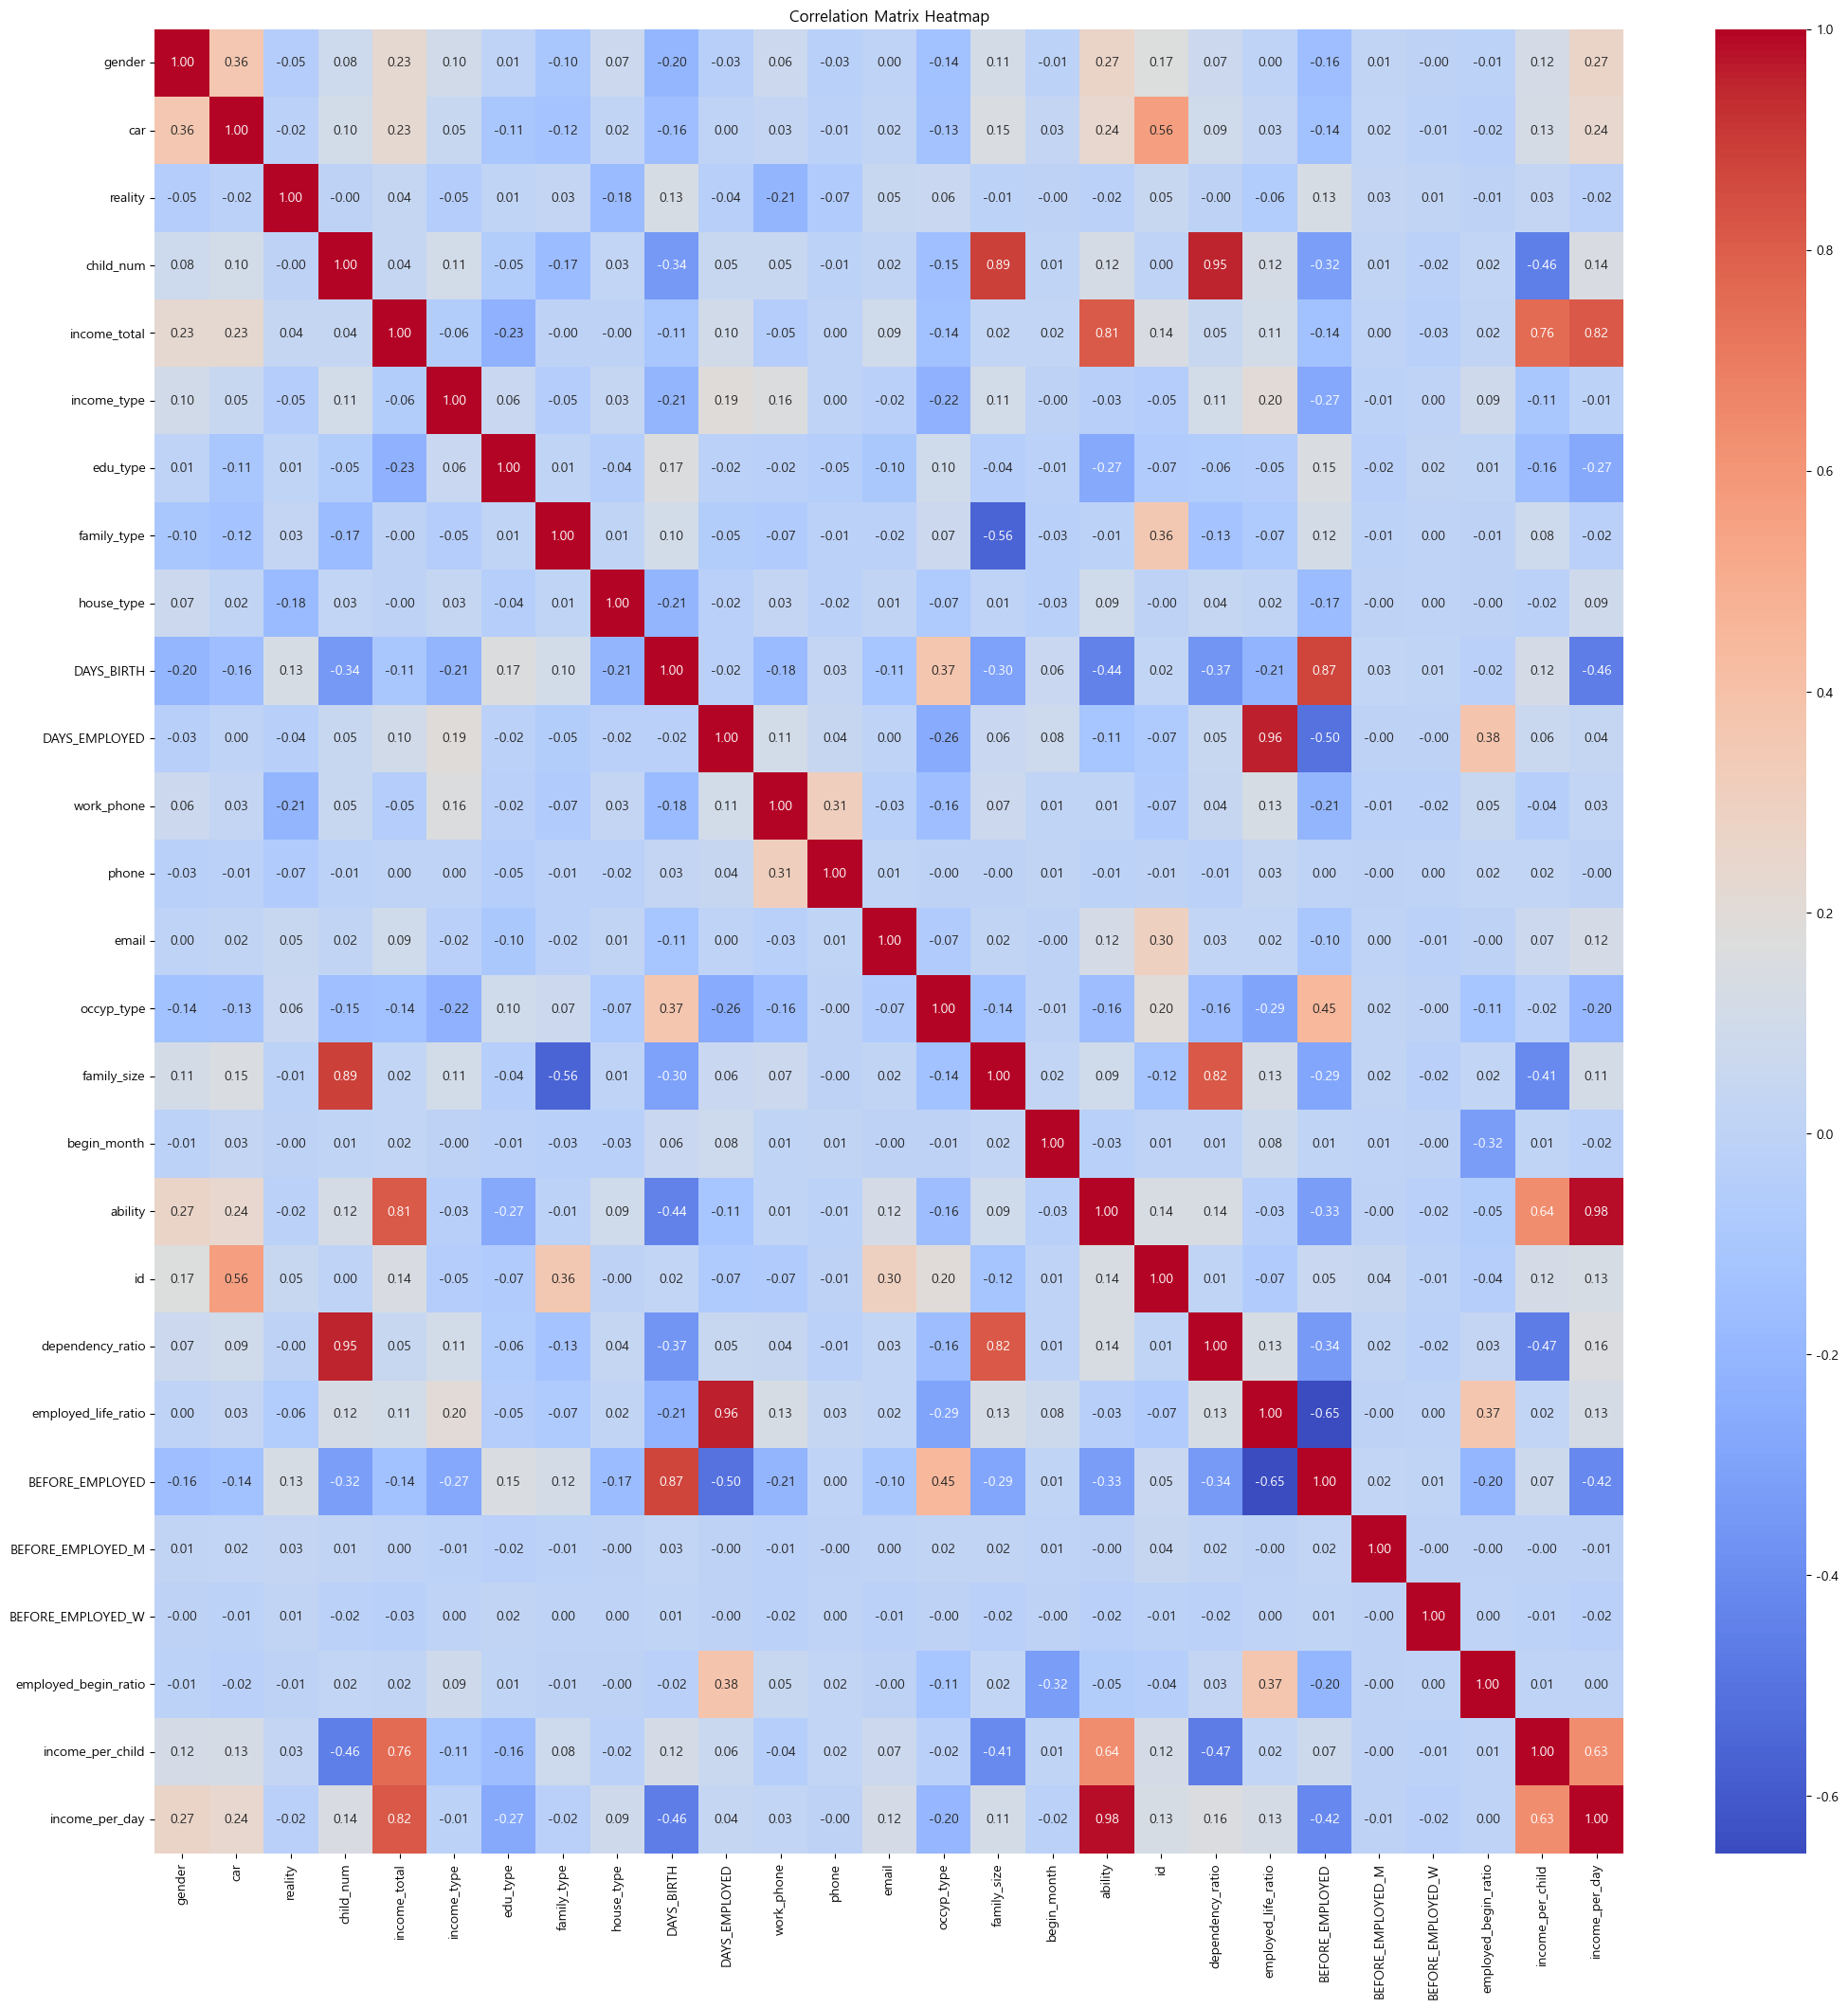

In [31]:
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_valid)
y_pred_proba = gb_model.predict_proba(X_valid)
print("Gradient Boosting Accuracy:", accuracy_score(y_valid, y_pred))
print("Gradient Boosting Log Loss:", log_loss(y_valid, y_pred_proba))

Gradient Boosting Accuracy: 0.6995967741935484
Gradient Boosting Log Loss: 0.7756575782448789


In [33]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_valid)
y_pred_proba = et_model.predict_proba(X_valid)
print("Extra Trees Accuracy:", accuracy_score(y_valid, y_pred))
print("Extra Trees Log Loss:", log_loss(y_valid, y_pred_proba))


Extra Trees Accuracy: 0.6999747983870968
Extra Trees Log Loss: 2.4875522089454685


In [34]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_valid)
y_pred_proba = ada_model.predict_proba(X_valid)
print("AdaBoost Accuracy:", accuracy_score(y_valid, y_pred))
print("AdaBoost Log Loss:", log_loss(y_valid, y_pred_proba))


AdaBoost Accuracy: 0.6968245967741935
AdaBoost Log Loss: 1.081005741054493


In [35]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gb_model = HistGradientBoostingClassifier(random_state=42)
hist_gb_model.fit(X_train, y_train)
y_pred = hist_gb_model.predict(X_valid)
y_pred_proba = hist_gb_model.predict_proba(X_valid)
print("HistGradientBoosting Accuracy:", accuracy_score(y_valid, y_pred))
print("HistGradientBoosting Log Loss:", log_loss(y_valid, y_pred_proba))


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoosting Accuracy: 0.7157258064516129
HistGradientBoosting Log Loss: 0.7250059862544438


In [36]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log', random_state=42)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_valid)
y_pred_proba = sgd_model.predict_proba(X_valid)
print("SGDClassifier Accuracy:", accuracy_score(y_valid, y_pred))
print("SGDClassifier Log Loss:", log_loss(y_valid, y_pred_proba))


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier Accuracy: 0.6631804435483871
SGDClassifier Log Loss: 0.877739006426217


In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_valid)
y_pred_proba = lr_model.predict_proba(X_valid)
print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print("Logistic Regression Log Loss:", log_loss(y_valid, y_pred_proba))


Logistic Regression Accuracy: 0.6687247983870968
Logistic Regression Log Loss: 0.8353360059761534


In [78]:
#xg부스트 튜닝
from sklearn.model_selection import StratifiedKFold

In [82]:
def objective(trial: Trial) -> float:
    params_xgboost = {
        'verbosity': 0,
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': len(np.unique(target)),
        'booster': 'gbtree',
        'tree_method': 'hist',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-3, 10.0, log=True),
        'random_state': 42,
        'early_stopping_rounds': 50
    }

    X_train_x, X_valid_x, y_train_x, y_valid_x = train_test_split(train, target, test_size=0.3, random_state=42)
    
    xmodel = xgb.XGBClassifier(**params_xgboost)
    xmodel.fit(X_train_x, y_train_x, eval_set=[(X_valid_x, y_valid_x)], verbose=False)
    
    pred = xmodel.predict_proba(X_valid_x)
    log_score = log_loss(y_valid_x, pred)
    
    return log_score

In [83]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name='xgboost_parameter_opt',
    direction='minimize',
    sampler=sampler
)

[I 2024-06-14 14:35:11,670] A new study created in memory with name: xgboost_parameter_opt


In [84]:
study.optimize(objective, n_trials=500)

[I 2024-06-14 14:35:14,183] Trial 0 finished with value: 0.7946300878459328 and parameters: {'lambda': 0.03148911647956861, 'alpha': 6.351221010640703, 'colsample_bytree': 0.839196365086843, 'subsample': 0.759195090518222, 'learning_rate': 0.01700037298921102, 'n_estimators': 240, 'max_depth': 3, 'min_child_weight': 9, 'gamma': 0.2537815508265665}. Best is trial 0 with value: 0.7946300878459328.
[I 2024-06-14 14:35:15,212] Trial 1 finished with value: 0.7829189894520331 and parameters: {'lambda': 0.679657809075816, 'alpha': 0.0012087541473056963, 'colsample_bytree': 0.9819459112971965, 'subsample': 0.899465584480253, 'learning_rate': 0.020589728197687916, 'n_estimators': 263, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.12561043700013558}. Best is trial 1 with value: 0.7829189894520331.
[I 2024-06-14 14:35:17,326] Trial 2 finished with value: 0.7424522082638191 and parameters: {'lambda': 0.05342937261279776, 'alpha': 0.014618962793704957, 'colsample_bytree': 0.7671117368334277, 's

In [85]:
print("Best Score : ", study.best_value)
print("Best trial : ", study.best_trial.params)

Best Score :  0.6960080312728981
Best trial :  {'lambda': 0.007103219382729176, 'alpha': 0.133189959716436, 'colsample_bytree': 0.40006829797848104, 'subsample': 0.6327723433079376, 'learning_rate': 0.014441574986224332, 'n_estimators': 918, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.005658088177049444}


In [103]:
xgb_model = xgb.XGBClassifier(random_state=42, **best_params)
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
cr_list = []
sub = np.zeros((test.shape[0], len(np.unique(target))))

In [104]:
for fold, (train_index, test_index) in enumerate(cv.split(train, target)):
    x_train, x_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    model = xgb_model.fit(x_train, y_train)
    pred = model.predict_proba(x_test)
    cross_entropy = log_loss(y_test, pred)
    cr_list.append(cross_entropy)
    sub += model.predict_proba(test)
    
    print(f"Fold {fold + 1} Log Loss: {cross_entropy:.4f}")

Fold 1 Log Loss: 0.6666
Fold 2 Log Loss: 0.7047
Fold 3 Log Loss: 0.6900
Fold 4 Log Loss: 0.6782
Fold 5 Log Loss: 0.7017
Fold 6 Log Loss: 0.7038
Fold 7 Log Loss: 0.6839
Fold 8 Log Loss: 0.6981
Fold 9 Log Loss: 0.7126
Fold 10 Log Loss: 0.6863
Fold 11 Log Loss: 0.6961
Fold 12 Log Loss: 0.7092
Fold 13 Log Loss: 0.6856
Fold 14 Log Loss: 0.7148
Fold 15 Log Loss: 0.6877


In [105]:
mysubmission = sub / 15
score = sum(cr_list) / 15

In [106]:
print('logloss:', score)

logloss: 0.6946273887806992


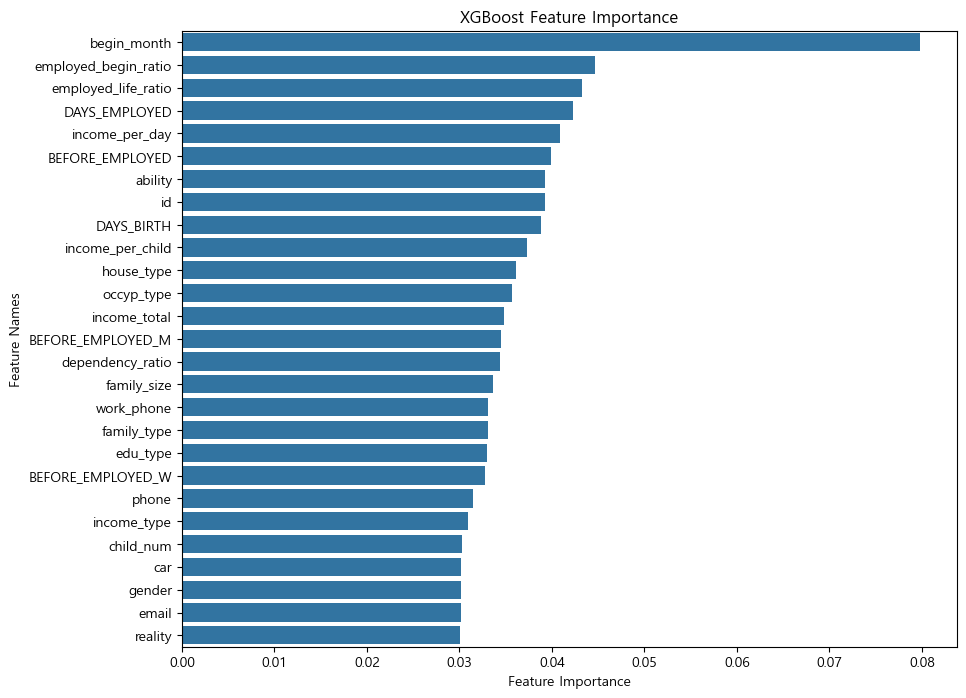

In [107]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(model.feature_importances_, train.columns, 'XGBoost')

In [ ]:
plt.figure(figsize=(10,8))
sns.barpot(x=fi_df['feature_importance'], fi_df['feature_names'], ascending=False, inplace=True)

In [108]:
sample = pd.read_csv('sample_submission.csv')
sample.iloc[:, 1:] = mysubmission

sample.to_csv(f'submission_XGBoost_{score:.4f}.csv', index=False)

In [69]:
# Catboost 하이퍼파라미터 튜닝
from optuna import Trial
from optuna.samplers import TPESampler
def objective(trial: Trial) -> float:

    params_catboost = {
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'depth': trial.suggest_int('depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 10),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 1.0, log=True),
        'eval_metric': 'MultiClass',
        'verbose': False,
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.3, random_state=42)
    
    model = CatBoostClassifier(**params_catboost)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=False)
    
    pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, pred)
    
    return log_score

In [71]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name='catboost_parameter_opt',
    direction='minimize',
    sampler=sampler
)

study.optimize(objective, n_trials=500)

[I 2024-06-14 12:30:45,685] A new study created in memory with name: catboost_parameter_opt
[I 2024-06-14 12:30:47,353] Trial 0 finished with value: 0.7421333412471316 and parameters: {'iterations': 218, 'depth': 9, 'learning_rate': 0.29106359131330695, 'min_child_samples': 6, 'border_count': 40, 'l2_leaf_reg': 1.7699302940633311e-07}. Best is trial 0 with value: 0.7421333412471316.
[I 2024-06-14 12:30:47,917] Trial 1 finished with value: 0.7793658076340375 and parameters: {'iterations': 76, 'depth': 8, 'learning_rate': 0.15930522616241014, 'min_child_samples': 8, 'border_count': 6, 'l2_leaf_reg': 0.574485163632042}. Best is trial 0 with value: 0.7421333412471316.
[I 2024-06-14 12:30:48,934] Trial 2 finished with value: 0.7933061957681524 and parameters: {'iterations': 425, 'depth': 2, 'learning_rate': 0.02310201887845294, 'min_child_samples': 2, 'border_count': 78, 'l2_leaf_reg': 0.00015777981883364995}. Best is trial 0 with value: 0.7421333412471316.
[I 2024-06-14 12:30:49,567] Trial

In [72]:
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

Best Score: 0.708756271288653
Best trial: {'iterations': 464, 'depth': 9, 'learning_rate': 0.04209516201771266, 'min_child_samples': 5, 'border_count': 131, 'l2_leaf_reg': 0.07119166337158081}


In [73]:
best_params = study.best_trial.params

In [74]:
cat = CatBoostClassifier(random_state=42, **best_params)

cv = StratifiedKFold(n_splits=15, shuffle=True) 

cr_list = []
sub=np.zeros((test.shape[0], 3)) 

for train_index, test_index in cv.split(train, target) :
        x_train, x_test = train.iloc[list(train_index)], train.iloc[list(test_index)]
        y_train, y_test = target.iloc[list(train_index)], target.iloc[list(test_index)]
        model = cat.fit(x_train,y_train)
        pred = model.predict_proba(x_test)
        cross_entropy = log_loss(y_test, pred)
        cr_list.append(cross_entropy)
        sub +=model.predict_proba(test)
        
mysubmission = sub/15

score = sum(cr_list)/15

0:	learn: 1.0737933	total: 23.4ms	remaining: 10.8s
1:	learn: 1.0510598	total: 46.5ms	remaining: 10.7s
2:	learn: 1.0306556	total: 69.7ms	remaining: 10.7s
3:	learn: 1.0121309	total: 90.8ms	remaining: 10.4s
4:	learn: 0.9951250	total: 114ms	remaining: 10.4s
5:	learn: 0.9798986	total: 134ms	remaining: 10.2s
6:	learn: 0.9660887	total: 154ms	remaining: 10.1s
7:	learn: 0.9531068	total: 175ms	remaining: 9.99s
8:	learn: 0.9411570	total: 196ms	remaining: 9.92s
9:	learn: 0.9301353	total: 217ms	remaining: 9.84s
10:	learn: 0.9200994	total: 238ms	remaining: 9.79s
11:	learn: 0.9105492	total: 261ms	remaining: 9.83s
12:	learn: 0.9015470	total: 283ms	remaining: 9.82s
13:	learn: 0.8941695	total: 289ms	remaining: 9.29s
14:	learn: 0.8867462	total: 310ms	remaining: 9.29s
15:	learn: 0.8801939	total: 330ms	remaining: 9.25s
16:	learn: 0.8738738	total: 350ms	remaining: 9.21s
17:	learn: 0.8674597	total: 371ms	remaining: 9.2s
18:	learn: 0.8617267	total: 393ms	remaining: 9.2s
19:	learn: 0.8571911	total: 413ms	remai

In [75]:
print('logloss:', score)

logloss: 0.7123096614529465


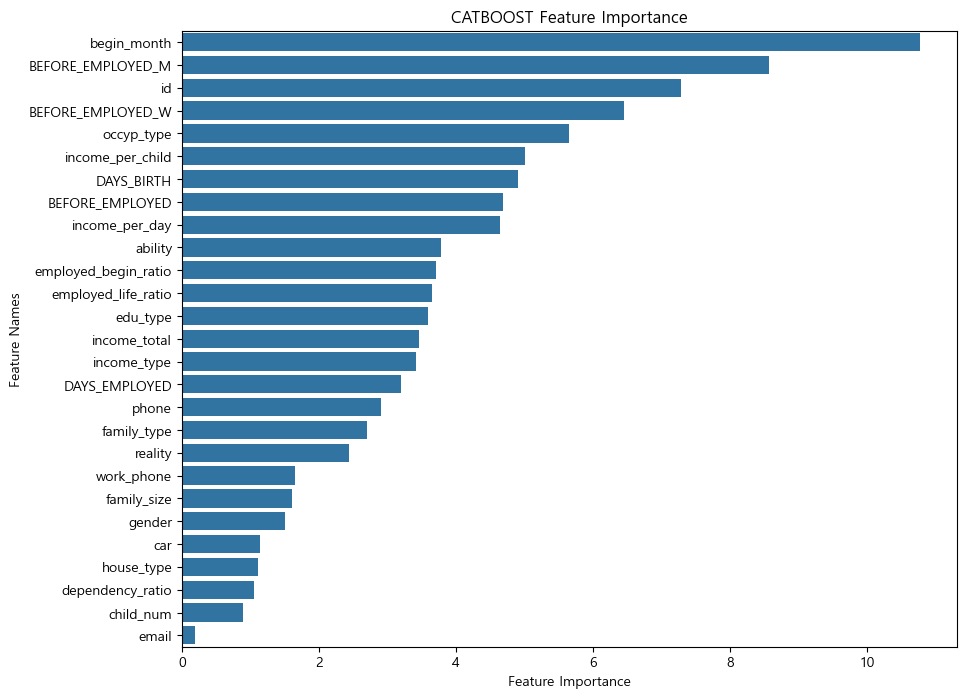

In [76]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(model.get_feature_importance(),test.columns,'CATBOOST')

In [77]:
sample = pd.read_csv('sample_submission.csv')
sample.loc[:,1:] = mysubmission

sample.to_csv(f'submission2_CatBoost{score:.4f}.csv', index=False)

C:\Users\kosa\AppData\Local\Temp\ipykernel_20020\1591182323.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  sample.loc[:,1:] = mysubmission


In [110]:
#가중 평균
clfs = []
cat_ = pd.read_csv('submission2_CatBoost0.7123.csv');
clfs.append(cat)
xgb_= pd.read_csv('submission_XGBoost_0.6946.csv');
clfs.append(lgb)

In [111]:
data_id = cat_.iloc[:,0]

In [114]:
log_loss = [0.7123, 0.6946 ]

In [115]:
weighted_average1 = []
for i in range(len(cat_)):
    weighted_average1.append(xgb_.iloc[i,1]*0.7 + cat_.iloc[i,1]*0.3)

In [116]:
weighted_average2 = []
for i in range(len(cat_)):
    weighted_average2.append(xgb_.iloc[i,2]*0.7 + cat_.iloc[i,2]*0.3)

In [117]:
weighted_average3 = []
for i in range(len(cat_)):
    weighted_average3.append(xgb_.iloc[i,3]*0.7 + cat_.iloc[i,3]*0.3)

In [118]:
ensemble3= pd.DataFrame({'index': cat_.iloc[:,0], '0':weighted_average1, '1':weighted_average2,'2':weighted_average3})

In [120]:
ensemble3.to_csv('ensemble3_.csv',index= False)

In [134]:
#soft voting
import optuna
import xgboost as xgb
from catboost import CatBoostClassifier
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import VotingClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

voting_model = VotingClassifier(
    estimators=[('catboost', cat), ('xgboost', xgb_model)],
    voting='soft'
)

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

cr_list = []
sub = np.zeros((test.shape[0], len(np.unique(target))))


In [135]:
for fold, (train_index, test_index) in enumerate(cv.split(train, target)):
    x_train, x_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    voting_model.fit(x_train, y_train)
    pred = voting_model.predict_proba(x_test)
    cross_entropy = log_loss(y_test, pred)
    cr_list.append(cross_entropy)
    sub += voting_model.predict_proba(test)
    
    print(f"Fold {fold + 1} Log Loss: {cross_entropy:.4f}")


0:	learn: 1.0737790	total: 25.5ms	remaining: 11.8s
1:	learn: 1.0511857	total: 49.7ms	remaining: 11.5s
2:	learn: 1.0308035	total: 74.7ms	remaining: 11.5s
3:	learn: 1.0122343	total: 99.9ms	remaining: 11.5s
4:	learn: 0.9951840	total: 123ms	remaining: 11.3s
5:	learn: 0.9800668	total: 145ms	remaining: 11.1s
6:	learn: 0.9662107	total: 168ms	remaining: 11s
7:	learn: 0.9531084	total: 190ms	remaining: 10.8s
8:	learn: 0.9410075	total: 214ms	remaining: 10.8s
9:	learn: 0.9303085	total: 237ms	remaining: 10.7s
10:	learn: 0.9200895	total: 259ms	remaining: 10.7s
11:	learn: 0.9105241	total: 284ms	remaining: 10.7s
12:	learn: 0.9016355	total: 306ms	remaining: 10.6s
13:	learn: 0.8935834	total: 328ms	remaining: 10.6s
14:	learn: 0.8859886	total: 352ms	remaining: 10.5s
15:	learn: 0.8789243	total: 374ms	remaining: 10.5s
16:	learn: 0.8727776	total: 396ms	remaining: 10.4s
17:	learn: 0.8661198	total: 418ms	remaining: 10.4s
18:	learn: 0.8607193	total: 441ms	remaining: 10.3s
19:	learn: 0.8550393	total: 464ms	remai

In [136]:
mysubmission = sub / 15
score = sum(cr_list) / 15

In [137]:
sample = pd.read_csv('sample_submission.csv')
sample.iloc[:, 1:] = mysubmission
sample.to_csv('ensemble5.csv', index=False)

print(f"Ensemble log loss: {score}")

Ensemble log loss: 0.6986751284174293
